In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

df = pd.read_csv("https://raw.githubusercontent.com/DATA-606-SPRING-2023-TUE/nicholas_data606/main/data/coffee_clean.csv")

# convert date to numeric value for regression
df['review_date'] = pd.to_datetime(df['review_date'], format='%m/%d/%Y')
df['review_date'] = df['review_date'].map(dt.datetime.toordinal)

df = df.dropna()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1891 entries, 0 to 2199
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          1891 non-null   int64  
 1   rating                      1891 non-null   int64  
 2   roaster                     1891 non-null   object 
 3   name                        1891 non-null   object 
 4   type_espresso               1891 non-null   int64  
 5   type_organic                1891 non-null   int64  
 6   type_fair_trade             1891 non-null   int64  
 7   type_decaffeinated          1891 non-null   int64  
 8   type_best_value             1891 non-null   int64  
 9   type_pod_capsule            1891 non-null   int64  
 10  type_blend                  1891 non-null   int64  
 11  type_estate                 1891 non-null   int64  
 12  type_peaberry               1891 non-null   int64  
 13  type_barrel_aged            1891 

,ID,rating,roaster,name,type_espresso,type_organic,type_fair_trade,type_decaffeinated,type_best_value,type_pod_capsule,...,aroma,acid,body,flavor,aftertaste,region,value_standard,blind_assessment_sentiment,notes_sentiment,bottom_line_sentiment
0,0,95,JBC Coffee Roasters,Wilton Benitez Geisha,0,0,0,0,0,0,...,9.0,9.0,9.0,9.0,9.0,south_america,0.110231,0.8832,0.9169,0.7650
1,1,95,Bird Rock Coffee Roasters,Colombia Cerro Azul Geisha,0,0,0,0,0,0,...,9.0,9.0,9.0,9.0,9.0,south_america,0.260146,0.8316,0.7506,0.4588
2,2,94,Regent Coffee,Yirgacheffe Mengesha Natural,0,0,0,0,1,0,...,9.0,9.0,9.0,9.0,8.0,africa_arabia,0.060260,0.7184,0.6908,0.3182
3,3,93,Regent Coffee,Colombia Tolima Finca El Mirador Washed Anaerobic,0,0,0,0,0,0,...,9.0,9.0,8.0,9.0,8.0,south_america,0.060260,0.7430,0.4939,0.7096
4,4,94,Theory Coffee Roasters,Panama Geisha Finca Debra Symbiosis,0,0,0,0,0,0,...,9.0,9.0,9.0,9.0,8.0,central_america,0.396832,0.8176,0.4215,0.7269


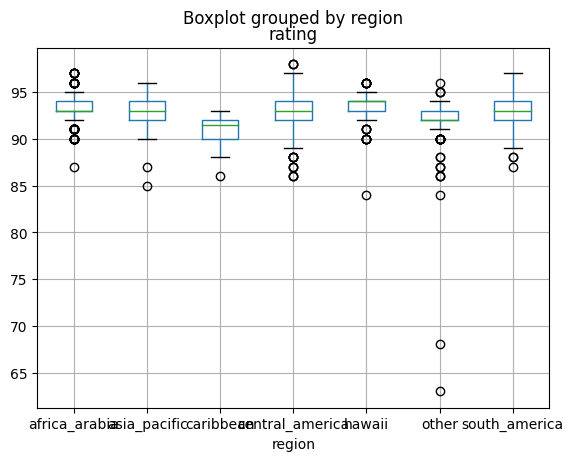

In [4]:
# 'region_africa_arabia', 'region_caribbean', 'region_central_america', 'region_hawaii', 'region_asia_pacific', 'region_south_america'
boxplot = df.boxplot(by = 'region', column=['rating'])

In [5]:
# standardize and compute eigen values to determine corelations
from sklearn.preprocessing import StandardScaler

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = df.select_dtypes(include=numerics)


scaler = StandardScaler(copy=True, with_std=True)
scaler_model = scaler.fit(numeric_columns)

df_standardized = pd.DataFrame(scaler_model.transform(numeric_columns), columns=list(numeric_columns.columns))

display(df_standardized)

import numpy as np
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
df_cov = df_standardized.cov()
print(df_cov)

eigen_values, eigen_vectors = np.linalg.eig(df_cov)
print(eigen_values)

,ID,rating,type_espresso,type_organic,type_fair_trade,type_decaffeinated,type_best_value,type_pod_capsule,type_blend,type_estate,...,review_date,aroma,acid,body,flavor,aftertaste,value_standard,blind_assessment_sentiment,notes_sentiment,bottom_line_sentiment
0,-1.707092,1.044809,-0.039862,-0.286021,-0.179458,-0.069153,-0.410764,0.0,-0.278375,1.292635,...,1.469103,0.333582,0.828318,0.722542,0.063858,1.748554,-0.002310,0.303058,0.993497,0.520972
1,-1.705565,1.044809,-0.039862,-0.286021,-0.179458,-0.069153,-0.410764,0.0,-0.278375,1.292635,...,1.469103,0.333582,0.828318,0.722542,0.063858,1.748554,0.514362,-0.130114,0.496773,-0.703858
2,-1.704038,0.505286,-0.039862,-0.286021,-0.179458,-0.069153,2.434490,0.0,-0.278375,1.292635,...,1.469103,0.333582,0.828318,0.722542,0.063858,-0.199894,-0.174534,-1.080408,0.318155,-1.266272
3,-1.702511,-0.034237,-0.039862,-0.286021,-0.179458,-0.069153,-0.410764,0.0,-0.278375,1.292635,...,1.469103,0.333582,0.828318,-1.237754,0.063858,-0.199894,-0.174534,-0.873895,-0.269968,0.299366
4,-1.700984,0.505286,-0.039862,-0.286021,-0.179458,-0.069153,-0.410764,0.0,-0.278375,1.292635,...,1.469103,0.333582,0.828318,0.722542,0.063858,-0.199894,0.985446,-0.247642,-0.486221,0.368568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,1.769732,-0.034237,-0.039862,-0.286021,-0.179458,-0.069153,-0.410764,0.0,-0.278375,1.292635,...,-2.051213,0.333582,0.828318,-1.237754,0.063858,-0.199894,0.043279,0.006721,0.400594,0.574173
1887,1.771258,0.505286,-0.039862,-0.286021,-0.179458,-0.069153,-0.410764,0.0,-0.278375,-0.773614,...,-2.051213,0.333582,0.828318,0.722542,0.063858,-0.199894,-0.082375,-1.666366,0.787997,0.598974
1888,1.772785,1.584331,-0.039862,-0.286021,-0.179458,-0.069153,-0.410764,0.0,-0.278375,1.292635,...,-2.051213,2.531504,0.828318,0.722542,0.063858,1.748554,0.174979,0.706849,0.901202,0.731377
1889,1.774312,1.044809,-0.039862,-0.286021,-0.179458,-0.069153,-0.410764,0.0,-0.278375,1.292635,...,-2.051213,0.333582,0.828318,0.722542,0.063858,1.748554,-0.128945,0.495300,1.096247,0.262165


                                  ID    rating  type_espresso  type_organic  \
ID                          1.000529 -0.114034      -0.038345      0.015482   
rating                     -0.114034  1.000529       0.041670     -0.125325   
type_espresso              -0.038345  0.041670       1.000529     -0.011407   
type_organic                0.015482 -0.125325      -0.011407      1.000529   
type_fair_trade             0.021509 -0.068540      -0.007157      0.547190   
type_decaffeinated         -0.014813 -0.106062      -0.002758      0.009287   
type_best_value             0.084424  0.048469       0.021443      0.087432   
type_pod_capsule            0.000000  0.000000       0.000000      0.000000   
type_blend                 -0.009526 -0.223891       0.040355      0.021034   
type_estate                -0.009051  0.109751       0.024085     -0.014638   
type_peaberry               0.021358  0.039058      -0.005064     -0.020318   
type_barrel_aged           -0.036762 -0.022883      

# Create Test Sets

In [6]:
from sklearn.model_selection import train_test_split

# split data frame into features and targets
df_target = df['rating']
df_features = df.drop(columns=['rating', 'roaster', 'name', 'roast', 'region', 'location', 'origin', 'agtron'])

# create test and train sets
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.1, random_state=42)

display(X_train)
display(y_train)

,ID,type_espresso,type_organic,type_fair_trade,type_decaffeinated,type_best_value,type_pod_capsule,type_blend,type_estate,type_peaberry,type_barrel_aged,type_aged,review_date,aroma,acid,body,flavor,aftertaste,value_standard,blind_assessment_sentiment,notes_sentiment,bottom_line_sentiment
1766,1822,0,0,0,0,0,0,0,0,0,0,0,737150,8.0,8.0,8.0,9.0,7.0,0.046885,0.8481,0.9595,0.7269
1422,1471,0,0,0,0,1,0,0,1,0,0,0,737546,9.0,9.0,9.0,9.0,8.0,0.085245,0.8996,0.9734,0.8442
34,34,0,0,0,0,0,0,0,0,0,0,0,738460,9.0,9.0,9.0,9.0,9.0,0.058202,0.8957,0.8360,0.9246
1803,1859,0,0,0,0,0,0,0,0,0,0,0,737119,8.0,8.0,8.0,9.0,8.0,0.044092,0.8957,0.4767,0.9100
526,539,0,0,0,0,0,0,0,0,0,0,0,738125,8.0,8.0,9.0,9.0,8.0,0.072687,0.9287,0.0000,0.8442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,1324,0,0,0,0,0,0,0,0,0,0,0,737638,8.0,8.0,8.0,9.0,8.0,0.047032,0.8720,0.7717,0.8225
1469,1518,0,1,1,0,0,0,0,0,0,0,0,737485,9.0,9.0,8.0,9.0,8.0,0.058794,0.8591,0.5859,0.4404
990,1025,0,0,0,0,1,0,1,0,0,0,0,737850,9.0,8.0,8.0,9.0,8.0,0.044092,0.8689,0.9651,0.7650
1667,1721,0,0,0,0,0,0,1,0,0,0,0,737272,9.0,8.0,8.0,9.0,8.0,0.101762,0.8442,0.3182,0.2382


1766    90
1422    94
34      95
1803    91
526     92
        ..
1286    91
1469    93
990     92
1667    92
1281    91
Name: rating, Length: 1701, dtype: int64

In [23]:
# USE only correlated data
df_features_cor = df[['aroma', 'acid', 'body', 'flavor', 'aftertaste']]

# create test and train sets
X_train_cor, X_test_cor, y_train_cor, y_test_cor = train_test_split(df_features_cor, df_target, test_size=0.1, random_state=24)

display(X_train_cor)
display(y_train_cor)

,aroma,acid,body,flavor,aftertaste
2183,9.0,8.0,8.0,9.0,8.0
1208,9.0,9.0,9.0,9.0,8.0
1028,9.0,9.0,9.0,9.0,9.0
1245,8.0,8.0,9.0,9.0,8.0
2145,8.0,9.0,9.0,9.0,8.0
...,...,...,...,...,...
1625,9.0,9.0,9.0,9.0,9.0
387,9.0,9.0,9.0,9.0,8.0
212,9.0,9.0,9.0,9.0,8.0
1033,9.0,8.0,9.0,9.0,8.0


2183    92
1208    94
1028    95
1245    92
2145    93
        ..
1625    95
387     94
212     94
1033    93
471     92
Name: rating, Length: 1701, dtype: int64

# Lasso Regression

In [8]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print("Lasso score on test data: ", lasso.score(X_test, y_test))

Lasso score on test data:  0.021479757174207248


In [9]:
y_pred

array([92.78047248, 92.98255735, 93.38485834, 92.78209816, 92.90288365,
       92.9978349 , 92.89515767, 92.86152628, 92.86925226, 93.03324935,
       92.98122886, 93.20201825, 93.07343494, 93.28978564, 92.84848637,
       92.95432743, 92.85820507, 92.88694252, 93.23024817, 92.89424851,
       92.98222556, 93.06413556, 93.05284346, 92.83133956, 93.12466906,
       93.4250446 , 92.85687659, 92.86626351, 93.24353299, 93.28824615,
       93.22792366, 93.25403873, 92.77271259, 92.83985123, 92.88386557,
       93.189188  , 92.90122271, 92.88652253, 93.28969676, 93.35222298,
       92.85733117, 93.13197571, 93.19018403, 93.12765781, 93.1253333 ,
       92.84462305, 93.31215884, 93.34823753, 92.89503487, 92.96374893,
       92.7812256 , 93.25458085, 93.19184497, 92.82835014, 92.83233559,
       93.18387407, 93.26919416, 92.96042772, 93.20666794, 93.03632631,
       93.36783231, 92.85886931, 92.83532367, 93.16859652, 92.92468082,
       93.10187519, 93.23821906, 93.24951116, 93.02162546, 93.02

In [10]:
# Use correlated data
lasso.fit(X_train_cor, y_train_cor)
y_pred_cor = lasso.predict(X_test_cor)
print("Lasso score on test data: ", lasso.score(X_test_cor, y_test_cor))

Lasso score on test data:  -0.000834267761306684


In [20]:
y_pred_cor

array([92.00709648, 94.98232598, 95.98351251, 92.01240991, 92.99583928,
       93.99889661, 94.98232598, 93.99889661, 93.00728465, 92.00422732,
       93.99889661, 93.00728465, 92.00422732, 92.99583928, 94.98232598,
       92.99583928, 91.00403915, 91.01222175, 95.98351251, 91.99565111,
       92.00422732, 93.99889661, 93.00728465, 92.99583928, 92.99583928,
       93.97926865, 92.99583928, 97.00332864, 87.02475396, 90.00916442,
       92.99583928, 92.99583928, 94.99908478, 92.00422732, 90.01961141,
       92.99583928, 92.99583928, 92.99583928, 94.98232598, 94.98232598,
       92.99583928, 93.99889661, 92.00422732, 92.99583928, 92.99583928,
       92.00422732, 93.99889661, 93.99889661, 94.98232598, 93.99889661,
       93.99889661, 92.00422732, 94.98232598, 93.99889661, 92.99583928,
       93.99889661, 93.99889661, 92.99583928, 94.98232598, 93.99889661,
       92.00709648, 91.00403915, 92.99583928, 92.99583928, 90.00285262,
       94.98232598, 93.00728465, 92.99583928, 93.00728465, 92.99

# Ridge Regression

In [24]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print("Ridge score on test data: ", ridge.score(X_test, y_test))

Ridge score on test data:  0.9939381159224442


In [25]:
display(X_train)
display(y_train)
display(y_pred)
display(y_test)

,ID,type_espresso,type_organic,type_fair_trade,type_decaffeinated,type_best_value,type_pod_capsule,type_blend,type_estate,type_peaberry,type_barrel_aged,type_aged,review_date,aroma,acid,body,flavor,aftertaste,value_standard,blind_assessment_sentiment,notes_sentiment,bottom_line_sentiment
1766,1822,0,0,0,0,0,0,0,0,0,0,0,737150,8.0,8.0,8.0,9.0,7.0,0.046885,0.8481,0.9595,0.7269
1422,1471,0,0,0,0,1,0,0,1,0,0,0,737546,9.0,9.0,9.0,9.0,8.0,0.085245,0.8996,0.9734,0.8442
34,34,0,0,0,0,0,0,0,0,0,0,0,738460,9.0,9.0,9.0,9.0,9.0,0.058202,0.8957,0.8360,0.9246
1803,1859,0,0,0,0,0,0,0,0,0,0,0,737119,8.0,8.0,8.0,9.0,8.0,0.044092,0.8957,0.4767,0.9100
526,539,0,0,0,0,0,0,0,0,0,0,0,738125,8.0,8.0,9.0,9.0,8.0,0.072687,0.9287,0.0000,0.8442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,1324,0,0,0,0,0,0,0,0,0,0,0,737638,8.0,8.0,8.0,9.0,8.0,0.047032,0.8720,0.7717,0.8225
1469,1518,0,1,1,0,0,0,0,0,0,0,0,737485,9.0,9.0,8.0,9.0,8.0,0.058794,0.8591,0.5859,0.4404
990,1025,0,0,0,0,1,0,1,0,0,0,0,737850,9.0,8.0,8.0,9.0,8.0,0.044092,0.8689,0.9651,0.7650
1667,1721,0,0,0,0,0,0,1,0,0,0,0,737272,9.0,8.0,8.0,9.0,8.0,0.101762,0.8442,0.3182,0.2382


1766    90
1422    94
34      95
1803    91
526     92
        ..
1286    91
1469    93
990     92
1667    92
1281    91
Name: rating, Length: 1701, dtype: int64

array([92.00682705, 94.97965912, 95.97262208, 92.00271868, 93.00870138,
       93.99619415, 94.99906525, 93.9961208 , 93.0051488 , 91.99754628,
       93.99712677, 93.01834645, 91.99895955, 92.99251871, 94.97585422,
       92.99224428, 91.00252401, 91.02420185, 95.98426858, 91.99354469,
       92.0003188 , 94.01048116, 93.00521306, 92.9917297 , 92.99093394,
       93.96927736, 92.9906623 , 97.01224329, 87.02380148, 90.01094368,
       92.98765711, 92.98684179, 95.00467707, 92.05054551, 90.0115074 ,
       92.99621802, 92.98497777, 93.01335943, 94.97394087, 94.97462962,
       92.99447585, 94.00020261, 91.99803569, 92.99089557, 93.02323846,
       91.99701709, 93.99615727, 93.99610842, 94.99654829, 93.9954659 ,
       93.99766965, 92.01032342, 94.99060379, 93.99898374, 93.00527808,
       93.99924608, 94.0209442 , 93.03782338, 94.98092129, 94.00101769,
       91.99777656, 91.00208423, 92.99811473, 92.98746801, 90.0120606 ,
       94.98206889, 93.0011644 , 92.98603383, 93.00839749, 93.00

2107    92
1202    95
148     96
2010    92
1435    93
        ..
1268    94
1959    92
834     96
1520    92
1349    92
Name: rating, Length: 190, dtype: int64

In [26]:
ridge.fit(X_train_cor, y_train_cor)
y_pred_cor = ridge.predict(X_test_cor)
print("Ridge score on test data: ", lasso.score(X_test_cor, y_test_cor))

Ridge score on test data:  -0.005814559784683926


In [21]:
y_pred_cor

array([92.00709648, 94.98232598, 95.98351251, 92.01240991, 92.99583928,
       93.99889661, 94.98232598, 93.99889661, 93.00728465, 92.00422732,
       93.99889661, 93.00728465, 92.00422732, 92.99583928, 94.98232598,
       92.99583928, 91.00403915, 91.01222175, 95.98351251, 91.99565111,
       92.00422732, 93.99889661, 93.00728465, 92.99583928, 92.99583928,
       93.97926865, 92.99583928, 97.00332864, 87.02475396, 90.00916442,
       92.99583928, 92.99583928, 94.99908478, 92.00422732, 90.01961141,
       92.99583928, 92.99583928, 92.99583928, 94.98232598, 94.98232598,
       92.99583928, 93.99889661, 92.00422732, 92.99583928, 92.99583928,
       92.00422732, 93.99889661, 93.99889661, 94.98232598, 93.99889661,
       93.99889661, 92.00422732, 94.98232598, 93.99889661, 92.99583928,
       93.99889661, 93.99889661, 92.99583928, 94.98232598, 93.99889661,
       92.00709648, 91.00403915, 92.99583928, 92.99583928, 90.00285262,
       94.98232598, 93.00728465, 92.99583928, 93.00728465, 92.99